# Plot helpers

Functions that help make nice plots and confusiones matrices

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../")
import SpikePy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



## Confusion matrix

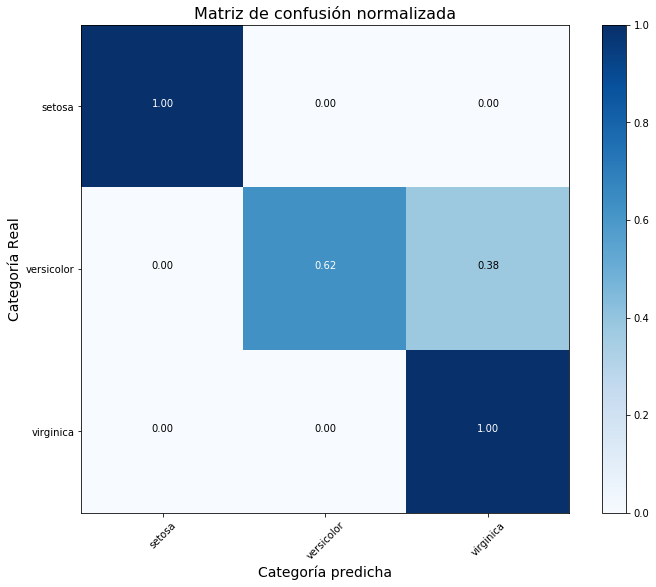

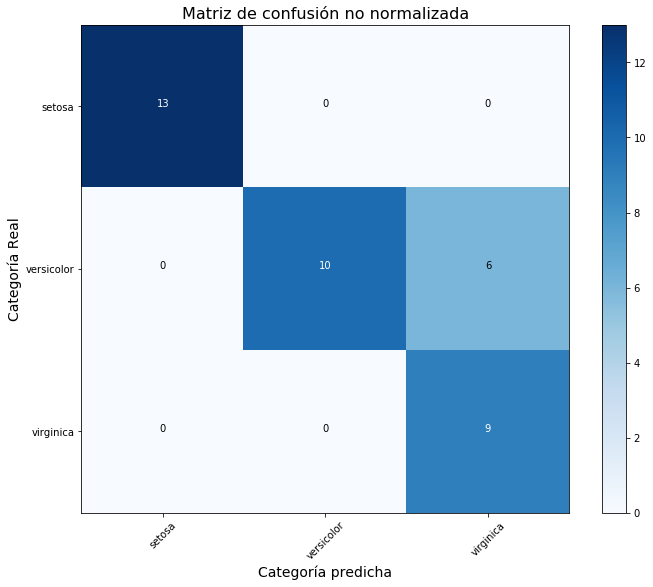

In [9]:
# Data and model
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(10, 8))
sp.plot_confusion_matrix(cnf_matrix, classes=class_names,
                  normalize=True, ylabel='Categoría Real', xlabel='Categoría predicha',
        title="Matriz de confusión normalizada")

plt.figure(figsize=(10, 8))
sp.plot_confusion_matrix(cnf_matrix, classes=class_names,
                  normalize=False, ylabel='Categoría Real', xlabel='Categoría predicha',
        title="Matriz de confusión no normalizada")

## Compare distributions (numerical & categorical)

In [11]:
import pandas as pd
iris = datasets.load_iris()
import matplotlib
matplotlib.style.use("fivethirtyeight")
X = iris.data
y = iris.target
class_names = iris.target_names
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target'] = pd.Categorical(df['target'])
df['group_sepal'] = pd.cut(df['sepal length (cm)'], bins=5)
df['group_petal'] = pd.cut(df['petal length (cm)'], bins=8)
df1 = df[0:70]
df2 = df[70::]


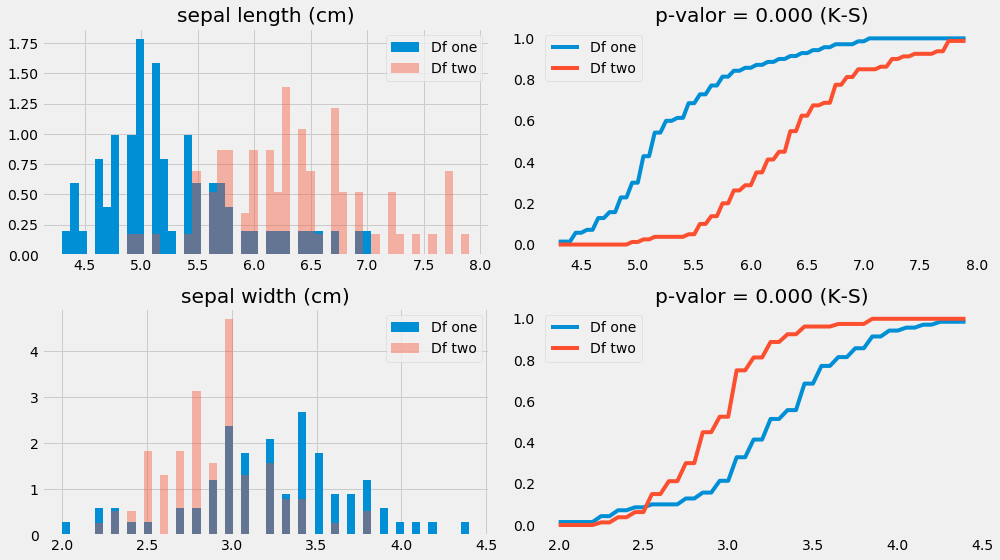

In [12]:
sp.compare_cont_dists(df1, df2, ['sepal length (cm)', 'sepal width (cm)'],
                     labels=['Df one', 'Df two']);

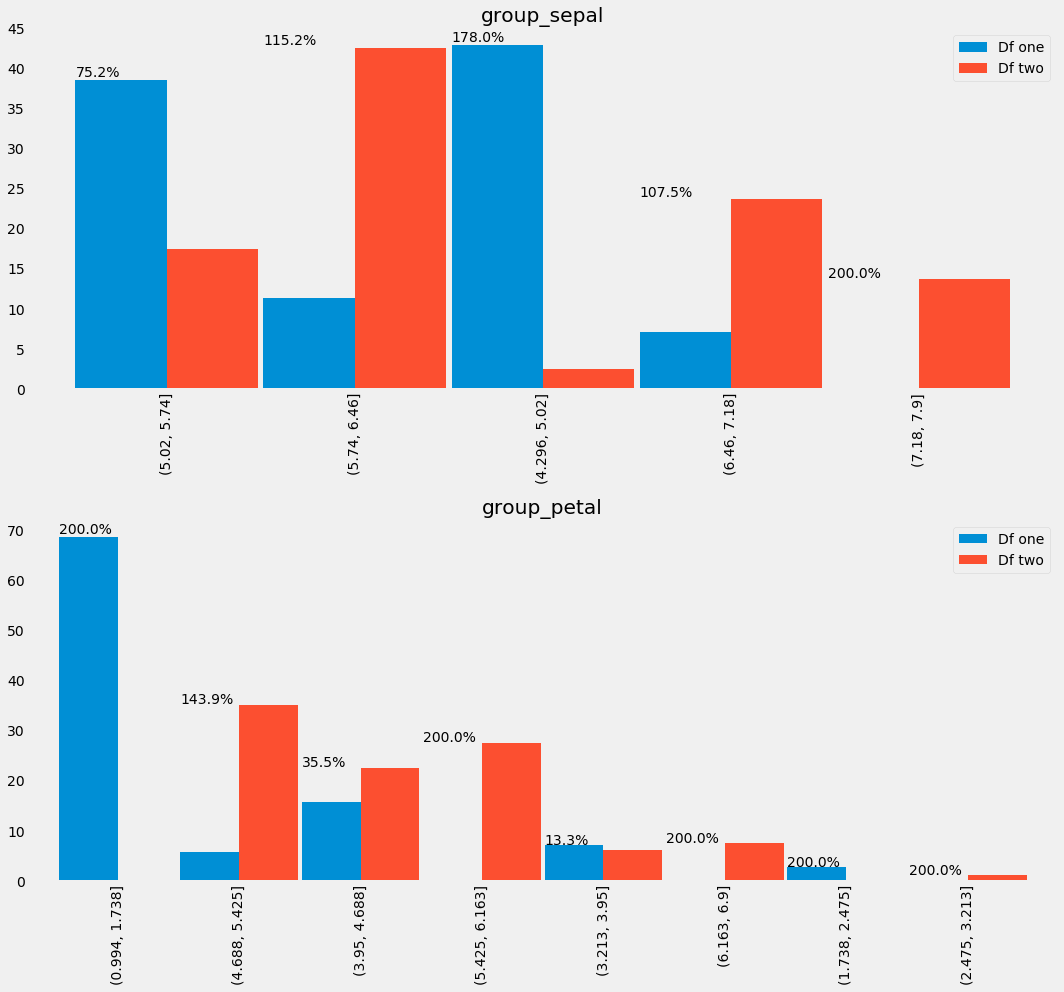

In [13]:
sp.compare_categorical_dists(df1, df2, ['group_sepal', 'group_petal'],
                     labels=['Df one', 'Df two']);

## Pdplot

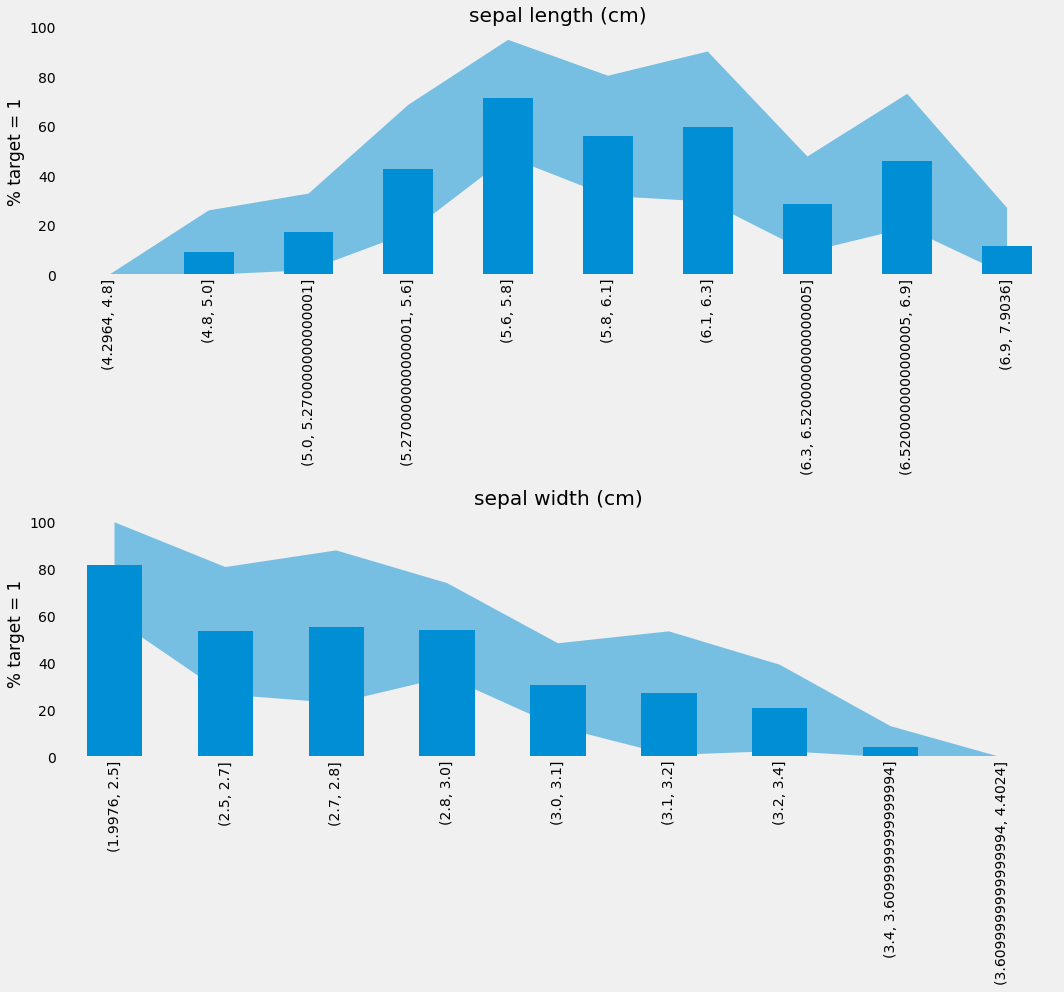

In [20]:
#Numerical variables
sp.pdplot(df, ['sepal length (cm)', 'sepal width (cm)'], 'target', numeric=True,
         nbins=10)

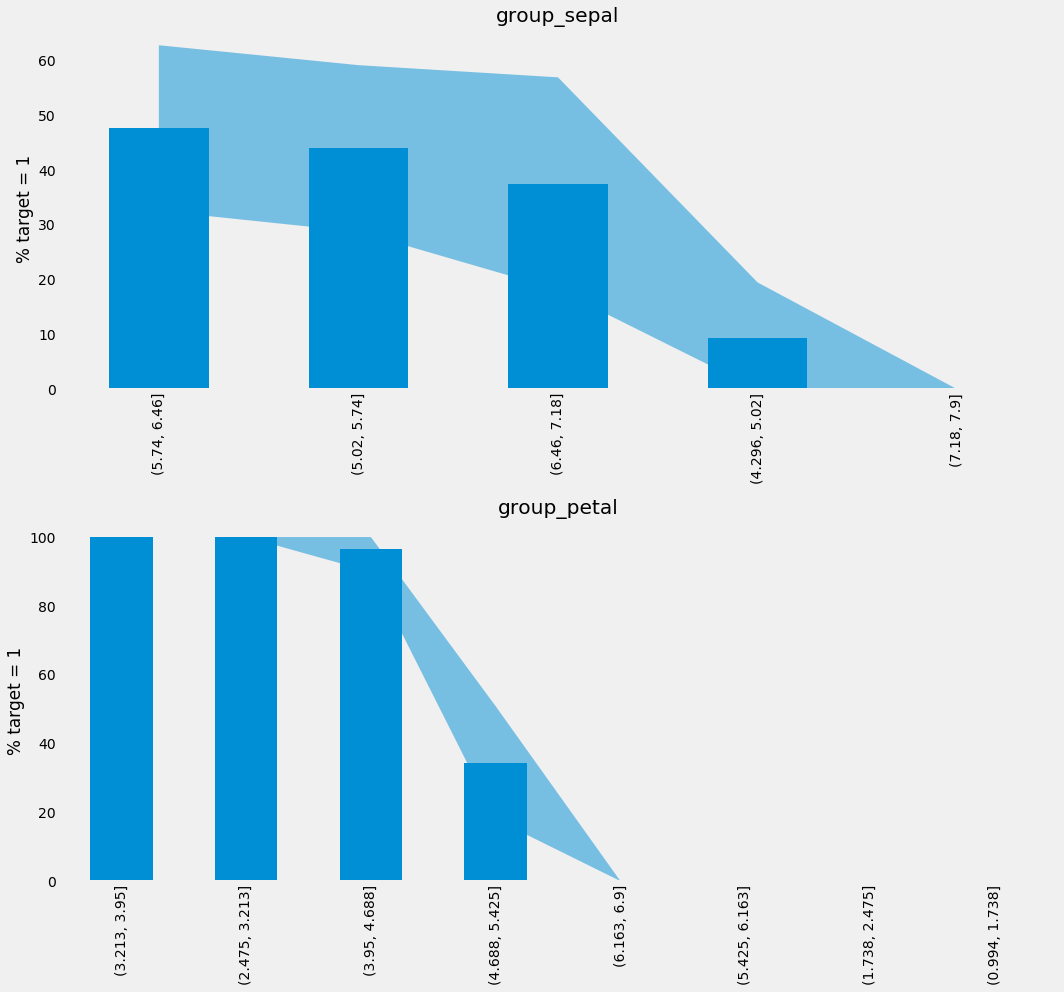

In [22]:
#Categorical variables
sp.pdplot(df, ['group_sepal', 'group_petal'], 'target', numeric=False)